<a href="https://colab.research.google.com/github/dvstar22/data_analysis/blob/main/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0%20%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%20%D0%92%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D0%B8%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.style.use('dark_background')

In [ ]:
import pandas as pd
import numpy as np

В 1950 году Джозеф Райн проводил эксперименты по выявлению людей с экстрасенсорными способностями. Каждый испытуемый должен был угадать цвет каждой карты в последовательности из 10 карт. В таком опыте вероятность случайно угадать 9 или 10 карт из 10 составляет 11*2-10 ≈ 0.01 — достаточно редкое событие, чтобы признать его маловероятным, поэтому Райн считал его свидетельством того, что испытуемый — экстрасенс. Однако, поскольку в опыте участвовало 1000 человек, вероятность того, что хотя бы один из них случайно угадает 9 или 10 карт составляла 1-(1-11*2-10)1000 ≈ 0.9998. Действительно, из 1000 испытуемых 12 человек угадали 9 из 10 карт, двое — все 10 карт. В последующих экспериментах ни один из них не подтвердил свои способности.

In [ ]:
cards = np.random.binomial(1,0.5,size=10)

In [ ]:
cards

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
guess = np.random.binomial(1,0.5,size=10)

In [ ]:
guess

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
cards == guess

array([False,  True,  True, False,  True,  True,  True,  True, False,
       False])

In [ ]:
(cards == guess).sum() >= 9

False

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
n = 10000
result = []
for _ in tqdm(range(n)):
  cards = np.random.binomial(1,0.5,size=10)
  guess = np.random.binomial(1,0.5,size=10)
  result.append((cards == guess).sum() >= 9)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
np.mean(result)

0.0119

In [ ]:
def experiment():
  cards = np.random.binomial(1,0.5,size=10)
  guess = np.random.binomial(1,0.5,size=10)
  return (cards == guess).sum() >= 9

In [ ]:
np.mean([experiment() for _ in range(10000)])

0.0104

H0: эксрасенсов нет  
H1: экстрасенсы есть  

In [ ]:
any([True,False,False])

True

In [ ]:
np.mean([any([experiment() for _ in range(10)]) for _ in range(1000)])

0.132

In [ ]:
np.mean([any([experiment() for _ in range(100)]) for _ in range(1000)])

0.649

In [ ]:
np.mean([any([experiment() for _ in range(1000)]) for _ in tqdm(range(1000))])

  0%|          | 0/1000 [00:00<?, ?it/s]

1.0

In [ ]:
group_size = [10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]

In [ ]:
result = []
for number_of_people in tqdm(group_size):
  prob = np.mean([any([experiment() for _ in range(number_of_people)]) for _ in range(1000)])
  result.append(prob)

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame({'number_of_people': group_size,
                  'prob': result})

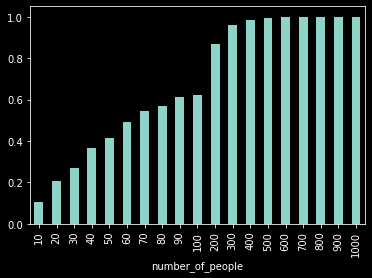

In [ ]:
t.set_index('number_of_people')['prob'].plot(kind='bar')

In [ ]:
t['prob_formula'] = 1 - (1 - 0.01) ** t['number_of_people']

In [ ]:
t

,number_of_people,prob,prob_formula
0,10,0.103,0.095618
1,20,0.208,0.182093
2,30,0.270,0.260300
3,40,0.366,0.331028
4,50,0.414,0.394994
5,60,0.493,0.452843
6,70,0.543,0.505161
7,80,0.571,0.552477
8,90,0.610,0.595268
9,100,0.620,0.633968


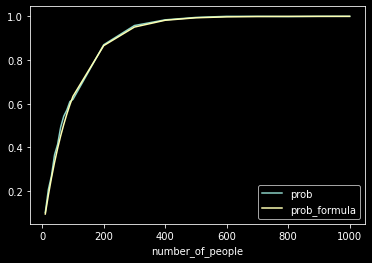

In [ ]:
t.set_index('number_of_people').plot()

test1  
test2  
control  

test1  
control1  
test2  
contro2  

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


H0: разницы между группами нет == пришли из одного распределения  
H1: разница есть (это двусторонний)  

Собираем доказательства: мы генерим две выборки и считаем разницу между ними

In [ ]:
a = np.random.binomial(1,0.2,size=1030)

In [ ]:
b = np.random.binomial(1,0.2,size=1030)

In [ ]:
a.mean()

0.20776699029126214

In [ ]:
b.mean()

0.1796116504854369

In [ ]:
abs(a.mean() - b.mean())

0.02815533980582524

Что в этом случае p-value? Это вероятность получить разницу такующе как 0.02815533980582524 или больше при верной нулевой гипотезе, т.е. что разницы между группами нет.

In [ ]:
_, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)],alternative='two-sided')

In [ ]:
pval

0.10591820904615581

In [ ]:
def experiment():
  a = np.random.binomial(1,0.2,size=1030)
  b = np.random.binomial(1,0.2,size=1030)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)],alternative='two-sided')
  return pval

In [ ]:
(pd.Series([experiment() for _ in range(1000)]) < 0.05).mean()

0.053

In [ ]:
any([experiment() < 0.05 for _ in range(2)])

False

In [ ]:
np.mean([any([experiment() < 0.05 for _ in range(2)]) for _ in range(10000)])

0.0954

In [ ]:
1 - (1 - 0.05) ** 2

0.09750000000000003

In [ ]:
np.mean([any([experiment() < 0.05 for _ in range(3)]) for _ in tqdm(range(10000))])

  0%|          | 0/10000 [00:00<?, ?it/s]

0.1425

In [ ]:
1 - (1 - 0.05) ** 3

0.1426250000000001

In [ ]:
np.mean([any([experiment() < 0.05 for _ in range(10)]) for _ in tqdm(range(1000))])

  0%|          | 0/1000 [00:00<?, ?it/s]

0.411

In [ ]:
np.mean([any([experiment() < (0.05 / 10) for _ in range(10)]) for _ in tqdm(range(1000))])

  0%|          | 0/1000 [00:00<?, ?it/s]

0.054